## Red Fox analysis

This notebook is dedicated to explore habits and moving patterns of individual red fox. 
We are only using the raw information of 
- timestamp (e.g. 2020-06-14 22:30:00.000)
- location-long (e.g. -92.931339)
- location-lat (e.g. 57.959365)

In [1]:
import pandas as pd

RF_path = "../data/red_fox.csv"
red_fox = pd.read_csv(RF_path)
print(red_fox.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12840 entries, 0 to 12839
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         12840 non-null  int64  
 1   visible                          12840 non-null  bool   
 2   timestamp                        12840 non-null  object 
 3   location-long                    12840 non-null  float64
 4   location-lat                     12840 non-null  float64
 5   gps:fix-type                     12840 non-null  int64  
 6   gps:fix-type-raw                 12840 non-null  object 
 7   gps:hdop                         12840 non-null  float64
 8   gps:satellite-count              12840 non-null  int64  
 9   sensor-type                      12840 non-null  object 
 10  individual-taxon-canonical-name  12840 non-null  object 
 11  tag-local-identifier             12840 non-null  object 
 12  individual-local-i

In [2]:
grouped = red_fox.groupby('tag-local-identifier')
print(grouped.size())

tag-local-identifier
1M701573     392
2M701573     610
F695853      214
F701532     1743
F701533     1944
F701536      661
F701540      996
F701542      417
F701543      443
F701544      544
M694011      305
M695476      662
M695496      388
M695855      433
M701529      722
M701531      775
M701535      746
M701574      845
dtype: int64


### Here we choose an individual fox that has enough data as individual analysis 

In [3]:
red_fox_F701533 = red_fox[red_fox['tag-local-identifier'].isin(['F701533'])]
red_fox_F701533 = red_fox_F701533[['timestamp', 'location-long', 'location-lat']]
# red_fox_F701533 = red_fox[['timestamp', 'location-long', 'location-lat']]
print(red_fox_F701533.info())
data_analyse = red_fox_F701533.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 1944 entries, 214 to 2157
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1944 non-null   object 
 1   location-long  1944 non-null   float64
 2   location-lat   1944 non-null   float64
dtypes: float64(2), object(1)
memory usage: 60.8+ KB
None


### Daily Section Moving Analysis

Each fox has a data recorded in 16 sections of a day to analyze a daily moving pattern. 

function explaination: calculate_average_distance_auto_sections

    Args:
        df (pd.DataFrame): DataFrame containing 'timestamp', 'location-lat', 'location-long' columns.
        interval_minutes (int): The interval in minutes for grouping timestamps, can be customized if not in 16 sections as some 
        foxes are not recorded this frequently 

    Returns:
        pd.DataFrame: A DataFrame with sections and average distances.

Note: here the distance is the direct distance between start and end position of a time section

In [4]:
import utils
import matplotlib.pyplot as plt

average_distances = utils.calculate_average_distance_auto_sections(data_analyse)

# Display the result
print(average_distances)

    section  avg_distance   section_label
0         0    366.590668  00:00 to 01:30
1         1    660.469329  01:30 to 03:00
2         2   1123.798310  03:00 to 04:30
3         3   1549.233416  04:30 to 06:00
4         4   1645.849371  06:00 to 07:30
5         5   1330.589034  07:30 to 09:00
6         6   1041.961249  09:00 to 10:30
7         7    592.112939  10:30 to 12:00
8         8    720.078290  12:00 to 13:30
9         9    583.750050  13:30 to 15:00
10       10    743.533219  15:00 to 16:30
11       11    799.131003  16:30 to 18:00
12       12    638.141142  18:00 to 19:30
13       13    508.650460  19:30 to 21:00
14       14    383.259631  21:00 to 22:30
15       15    351.023782  22:30 to 24:00


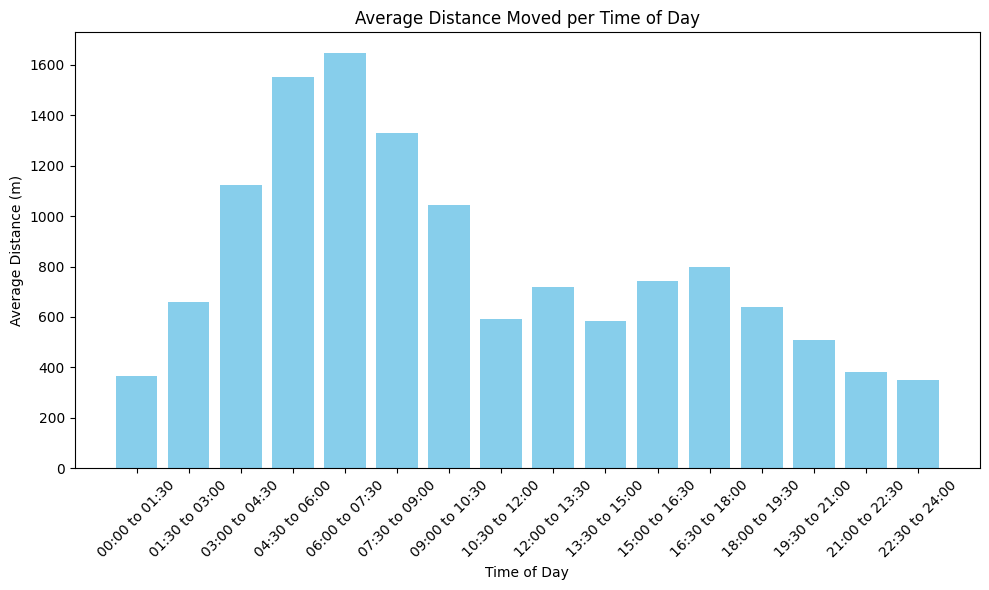

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(average_distances['section_label'], average_distances['avg_distance'], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Average Distance (m)')
plt.xlabel('Time of Day')
plt.title('Average Distance Moved per Time of Day')
plt.tight_layout()
plt.show()

### Monthly Moving Analysis

Here we analyze the average daily moving distance each month to see which month(s) does the fox have a higher energy

function explaination: calculate_total_distance_per_day_per_month


    Args:
        df (pd.DataFrame): DataFrame containing 'timestamp', 'location-lat', 'location-long' columns.

    Returns:
        pd.DataFrame: A DataFrame with months and the average daily total distance.



In [6]:
monthly_avg_distances = utils.calculate_total_distance_per_day_per_month(data_analyse)

# Display the result
print(monthly_avg_distances)

     month  avg_daily_total_distance
0  2019-04               8641.066251
1  2019-05               9151.372066
2  2019-06              14050.698699
3  2020-03              10531.110730
4  2020-04               9061.684887
5  2020-05               9539.675391
6  2020-06              14187.531656


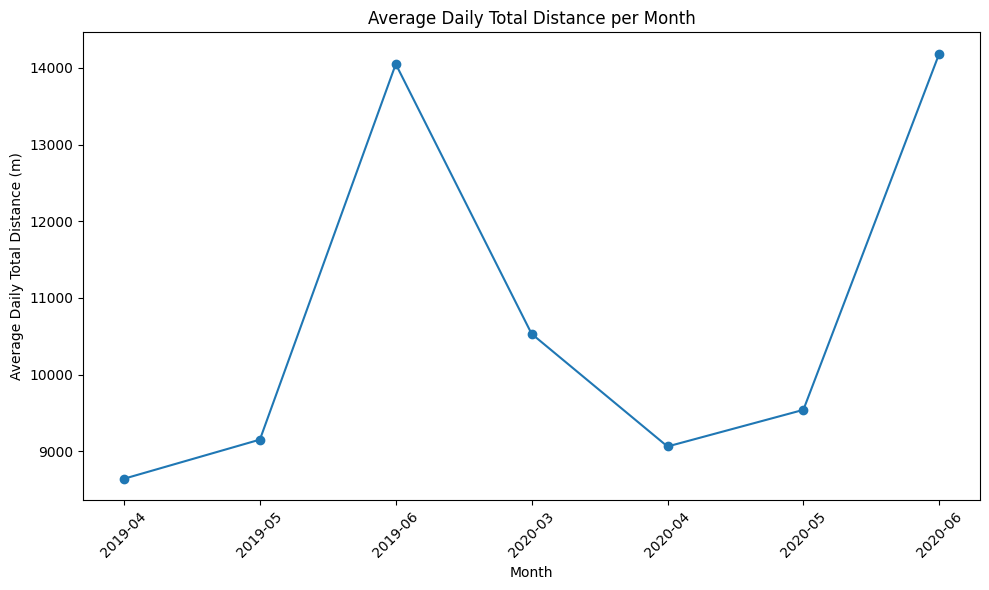

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_distances['month'], monthly_avg_distances['avg_daily_total_distance'], marker='o')
plt.xticks(rotation=45)
plt.ylabel('Average Daily Total Distance (m)')
plt.xlabel('Month')
plt.title('Average Daily Total Distance per Month')
plt.tight_layout()
plt.show()

### Daily Moving Direction Analysis

We want to know where the fox usually heading to in each time of the day. The orientation is simplified as into a eight direction list

function explaination: calculate_moving_directions
    
    Args:
        df (pd.DataFrame): DataFrame containing 'timestamp', 'location-lat', 'location-long' columns.
        interval_minutes (int): Interval in minutes to define sections.

    Returns:
        pd.DataFrame: A DataFrame with sections and predominant moving directions.

The direction is calculated based on the predominant directions amoung all days in each section

In [8]:
directions_analysis = utils.calculate_moving_directions(data_analyse)

# Display the result
print(directions_analysis)

    section predominant_direction   section_label
0         0                    SE  00:00 to 01:30
1         1                    NE  01:30 to 03:00
2         2                     N  03:00 to 04:30
3         3                     N  04:30 to 06:00
4         4                    NW  06:00 to 07:30
5         5                     N  07:30 to 09:00
6         6                     W  09:00 to 10:30
7         7                     S  10:30 to 12:00
8         8                     S  12:00 to 13:30
9         9                    SE  13:30 to 15:00
10       10                     S  15:00 to 16:30
11       11                     S  16:30 to 18:00
12       12                    SE  18:00 to 19:30
13       13                    SE  19:30 to 21:00
14       14                    SW  21:00 to 22:30
15       15                    NE  22:30 to 24:00


### Monthly Moving Direction Analysis

We also want to find which direction is the fox migrating every month and how much distance

function explaination: calculate_monthly_distance_and_direction

    The distance and direction is calculated based on start of the month and end of the month. 

In [9]:
monthly_distance_and_direction = utils.calculate_monthly_distance_and_direction(data_analyse)

# Display the result
print(monthly_distance_and_direction)

     month  total_distance direction
0  2019-04     3797.490068        SW
1  2019-05     6032.498268        NW
2  2019-06      727.346543        SW
3  2020-03      549.751299         W
4  2020-04     4027.881209        NE
5  2020-05     3430.484032         W
6  2020-06     6226.357731         S


### Frequent Area Vistited Analysis
We want to know the approximate areas of home, hunting or other frequent activities happens by analyzing the frequent places visited by the fox

function explaination: calculate_frequent_areas:

    Args:
        df (pd.DataFrame): DataFrame containing 'timestamp', 'location-lat', and 'location-long' columns.
        num_clusters (int): Number of clusters to use for KMeans clustering.

    Returns:
        pd.DataFrame: A DataFrame with the most frequent areas and their frequencies.

The returned location is the center point of each cluster. Can be clearer or better understood with visualization

Most frequent hour shows when the fox usually visit this cluster area

In [11]:
frequent_areas = utils.calculate_frequent_areas(data_analyse, 5)
print(frequent_areas)

   cluster  frequency  location-lat  location-long  most_frequent_hour
0        2        658     57.951732     -92.935670                   4
1        1        507     57.872984     -92.869947                  19
2        4        441     57.880238     -92.933876                  18
3        3        179     57.912628     -92.928188                   6
4        0        159     57.896647     -92.965259                   6
